<a href="https://colab.research.google.com/github/Jhatrilok02/CustomerChunkPrediction_1/blob/main/CustomerCurnPridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
customer_churn_df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Two types of feature are there
1)Categorical(two or more values) not in order
2)Numerical(columns are:- tenure, Monthlycharges, TotalCharges)

Tenure:-No of month customer stay in organisation.
Monthlycharge:- Amount of money charge to the customer monthly.
TotalCharges:- Total amount charged to the customer.

target variable = chunk


In [5]:
customer_churn_df.shape #means data set has 7043 rows and 21 columns

(7043, 21)

In [6]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
customer_churn_df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#checking duplicate value and null value
#customer_churn_df.isnull().sum()
customer_churn_df.duplicated().sum()

0

Here Totalcharges are in the object datatype here we nwwd to change it in float

In [9]:
customer_churn_df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
customer_churn_df['TotalCharges']=pd.to_numeric(customer_churn_df['TotalCharges'],errors='coerce')
customer_churn_df['TotalCharges'].dtypes

dtype('float64')

In [11]:
customer_churn_df['TotalCharges'].isnull().sum()

11

making list of categorical feature , numerical feature and target variable.

In [12]:
categorical_feature=["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
numeric_feature=["tenure", "MonthlyCharges", "TotalCharges"]
target_feature="Churn"

In [13]:
customer_churn_df.corr(numeric_only=True) # here is corelation matricx for numeric columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [15]:
customer_churn_df[categorical_feature].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

**Feature Distribution**

Numerical Feature Distribution

In [16]:
customer_churn_df[numeric_feature].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


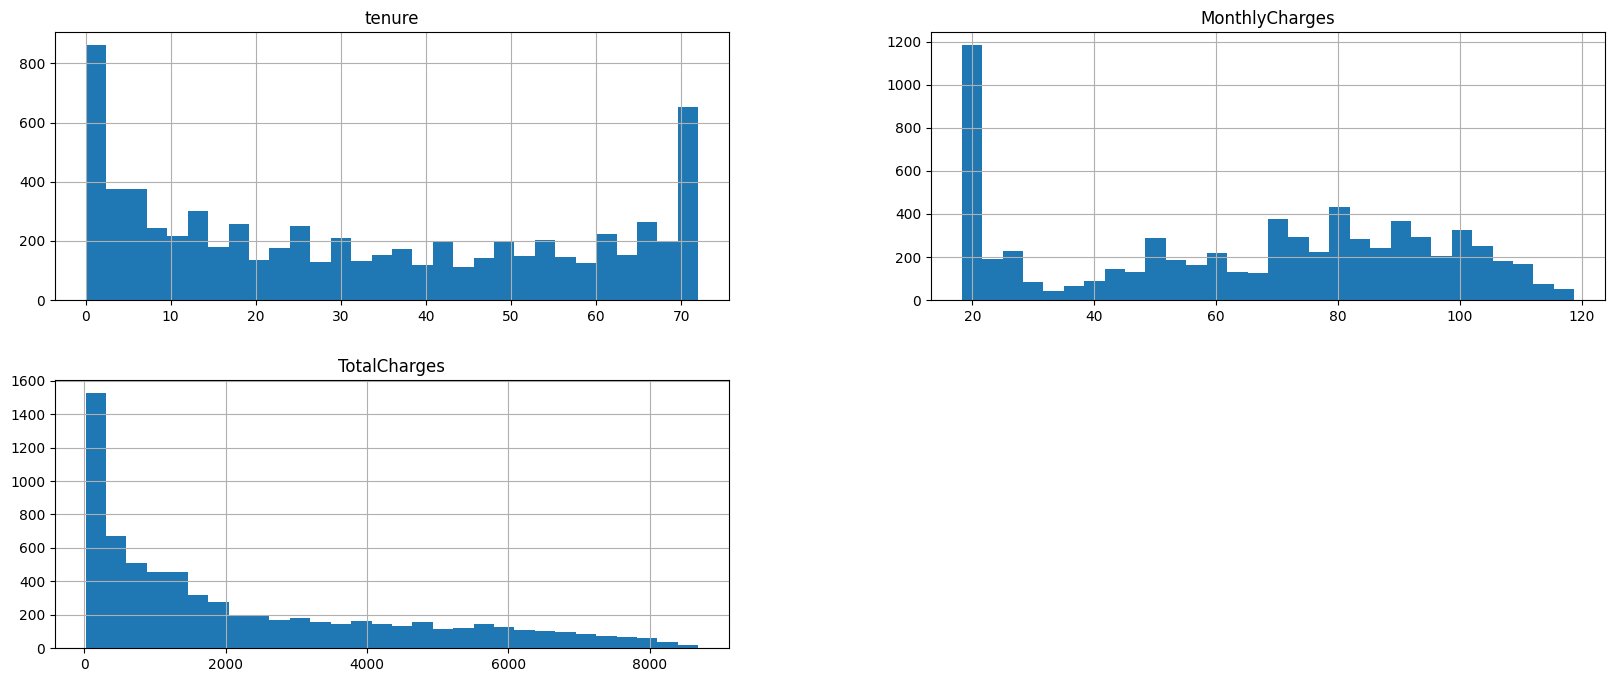

In [17]:
customer_churn_df[numeric_feature].hist(bins=30, figsize=(20,8))
plt.show()

#show the distribution of numerical features
#in staring tenure is high approx 0-2 month perioud and again it high 70-80,

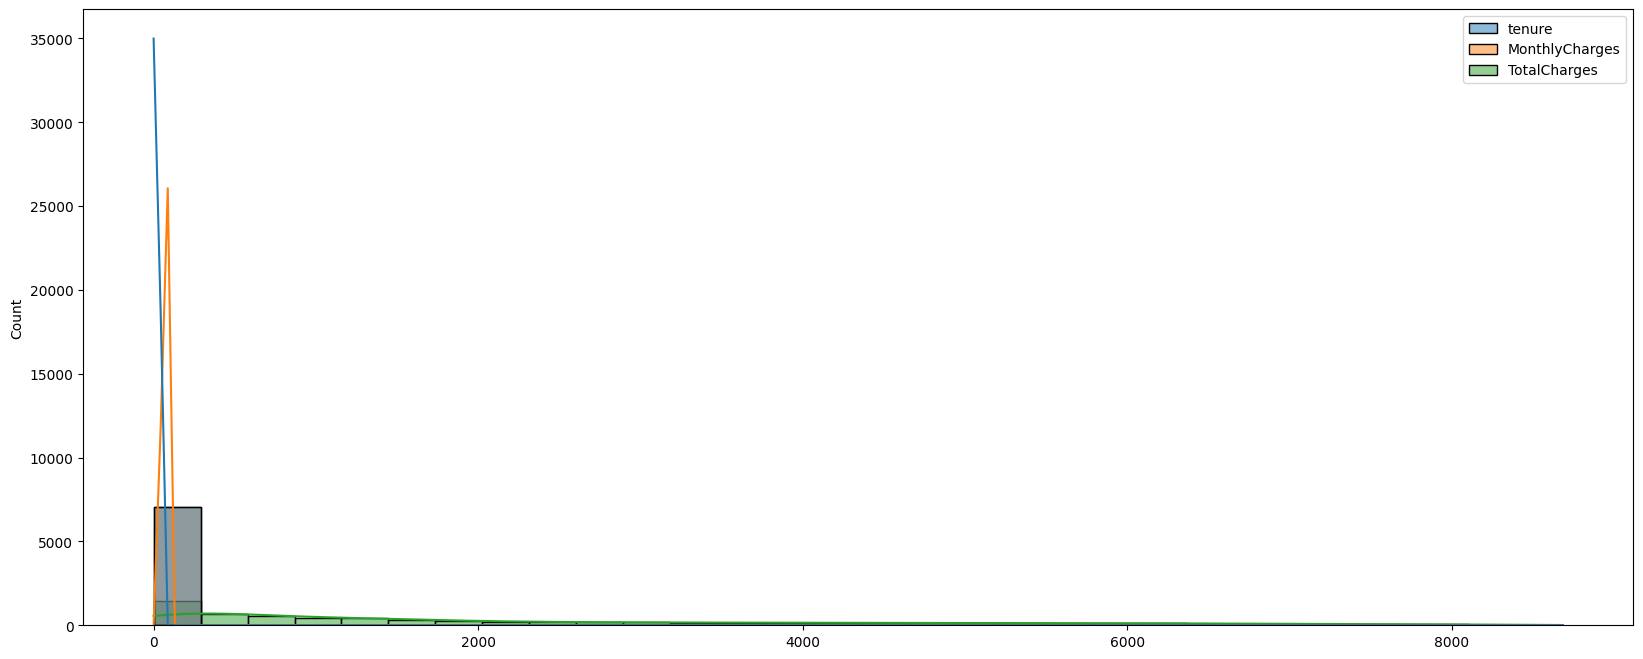

In [18]:
plt.figure(figsize=(20, 8))
sns.histplot(customer_churn_df[numeric_feature], bins=30, kde=True)
plt.show()

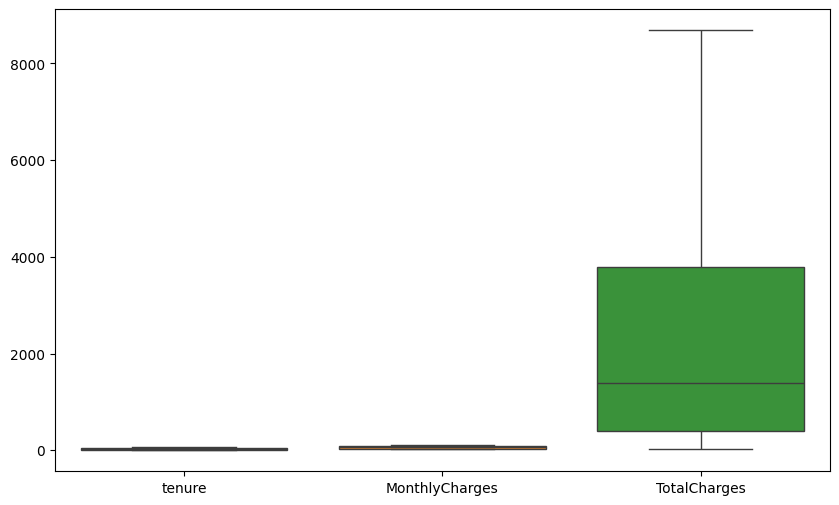

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=customer_churn_df[numeric_feature], ax=ax)
plt.show()

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

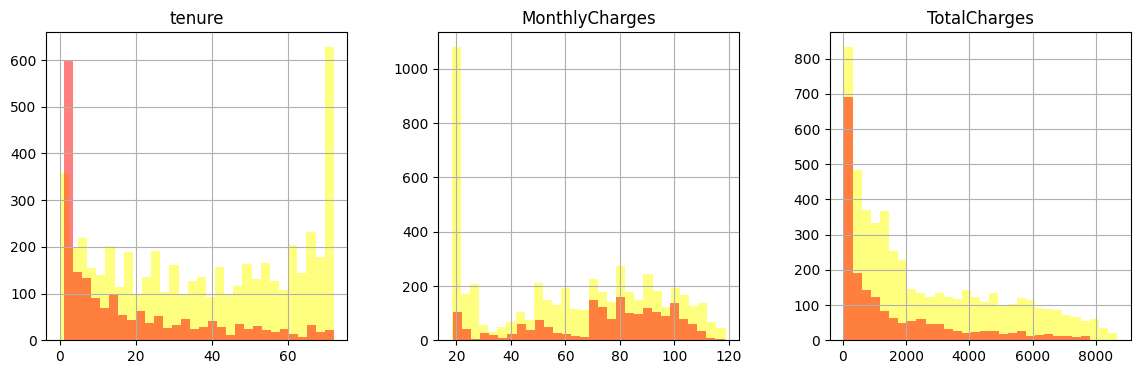

In [20]:
fig, ax = plt.subplots(1,3,figsize=(14, 4))
customer_churn_df[customer_churn_df.Churn=="No"][numeric_feature].hist(bins=30, alpha=0.5, color="yellow", ax=ax)

customer_churn_df[customer_churn_df.Churn=="Yes"][numeric_feature].hist(bins=30, alpha=0.5, color="red", ax=ax)

#yellow color shpwing not chunk
#red color showing chunk

Categorical Feature Distribution

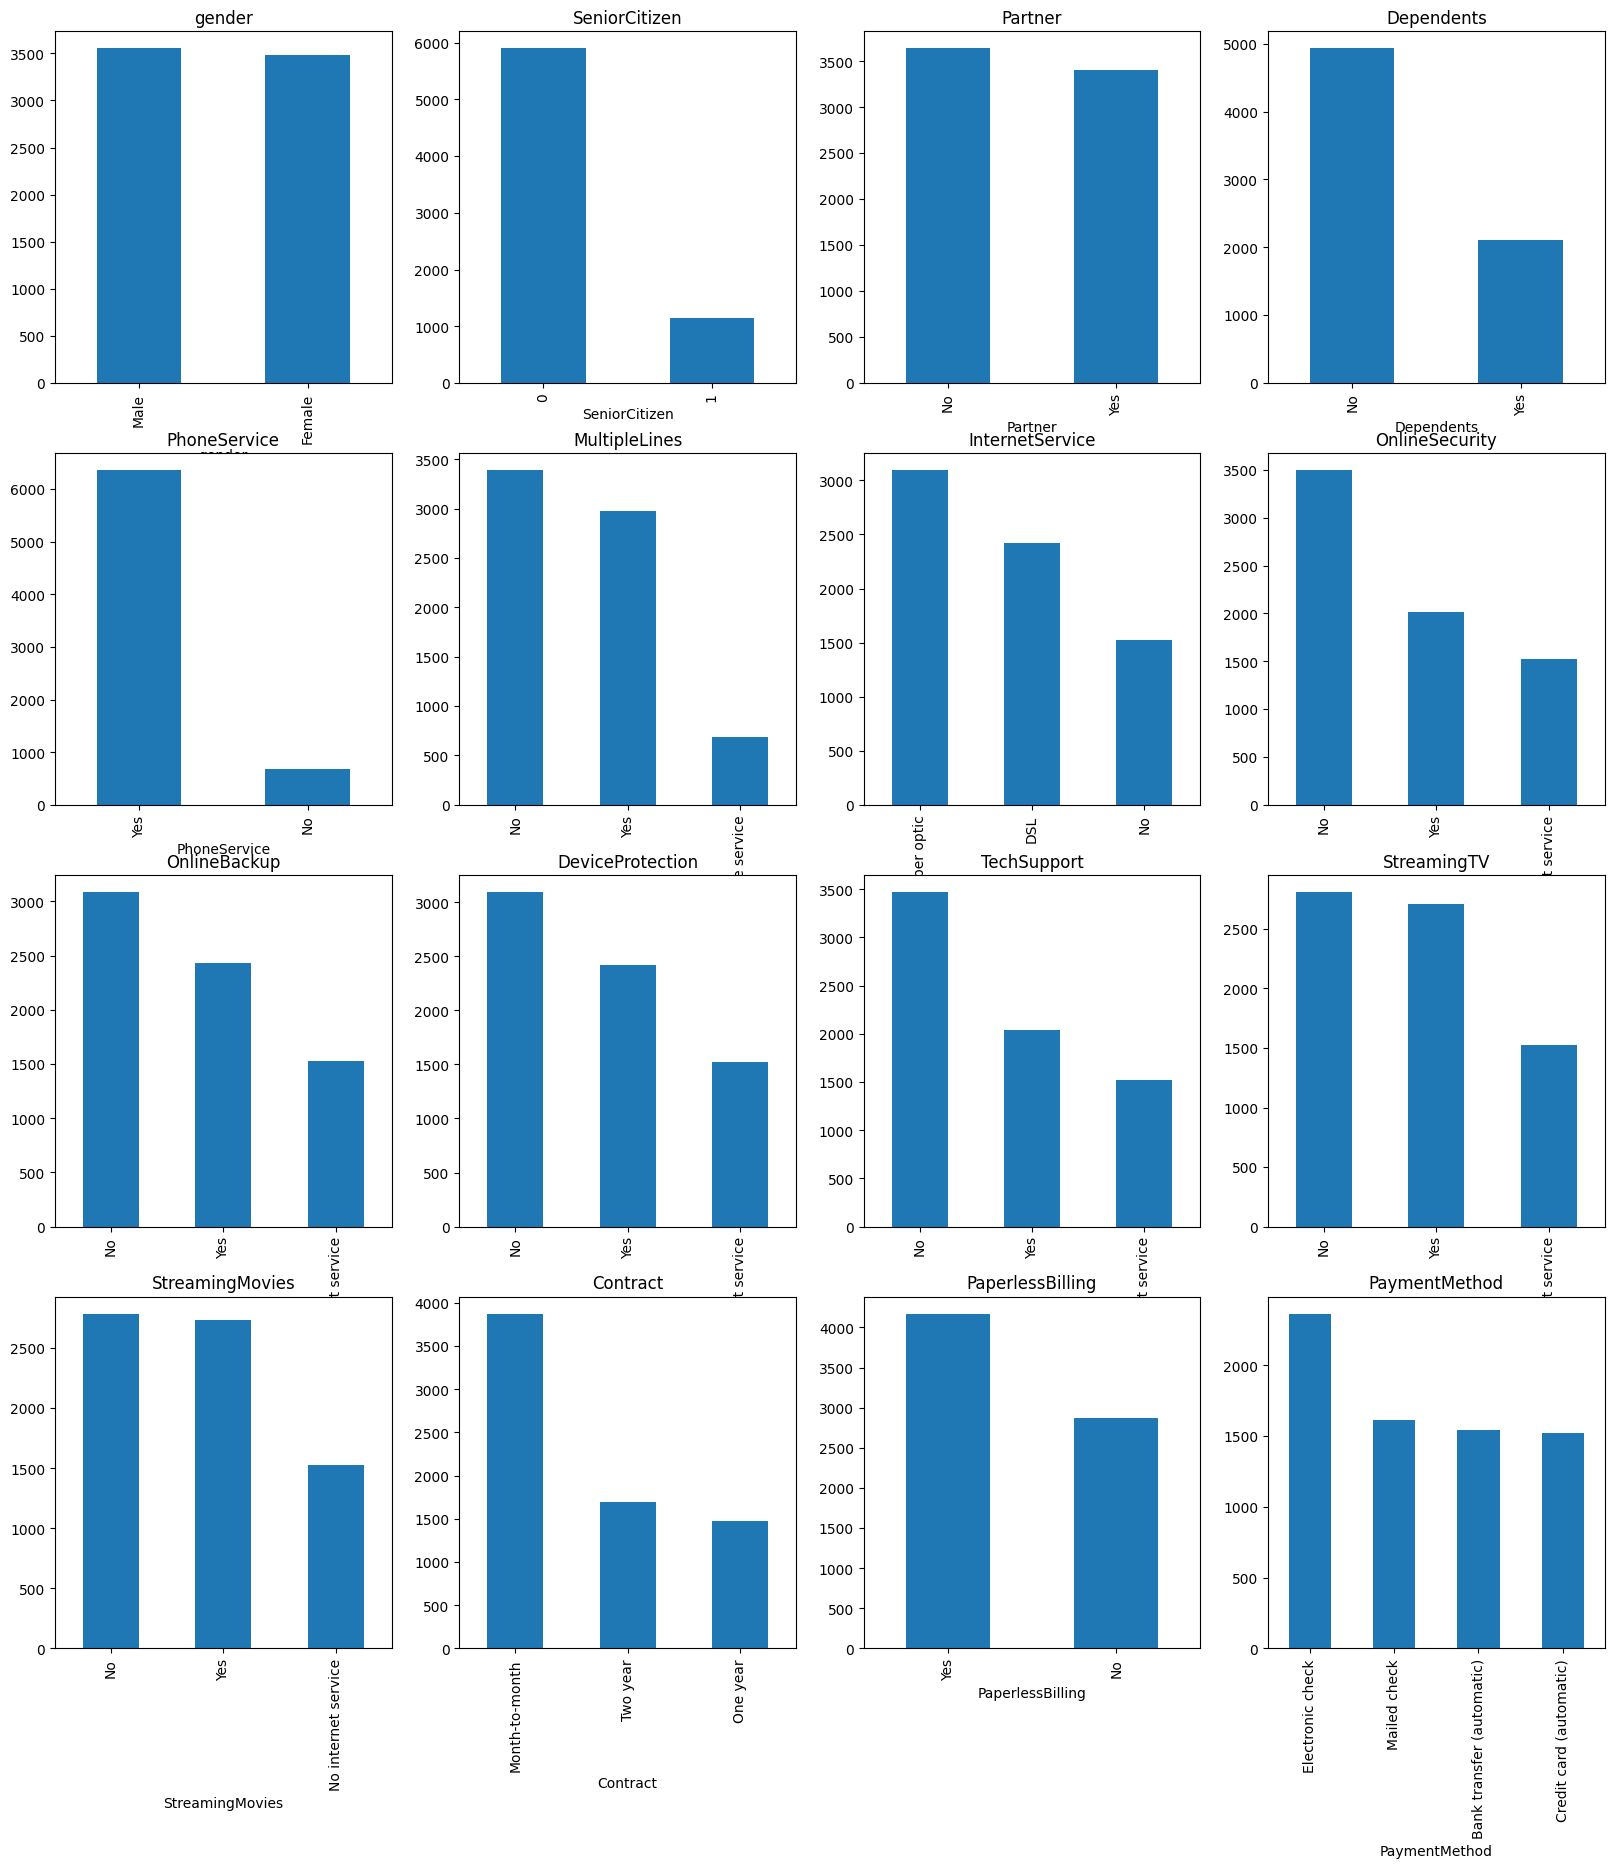

In [21]:
Rows , Colm = 4,4
fig, ax = plt.subplots(Rows, Colm, figsize=(20, 21))
row,col=0,0,
for i,categorical_feat in enumerate(categorical_feature):
  if col==Colm-1:
    row +=1
  col=i % Colm
  customer_churn_df[categorical_feat].value_counts().plot(kind="bar", ax=ax[row , col]).set_title(categorical_feat)


Text(0.5, 1.0, 'churned')

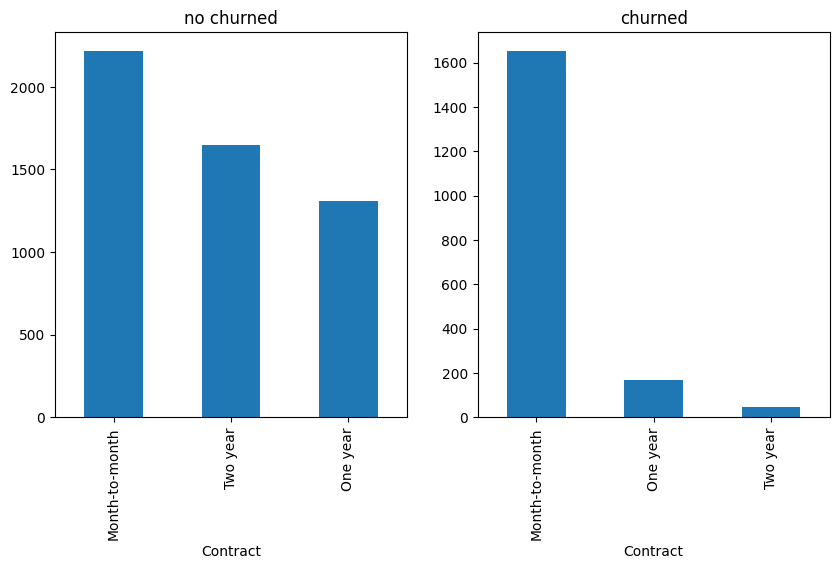

In [22]:
feature='Contract'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
customer_churn_df[customer_churn_df.Churn=="No"][feature].value_counts().plot(kind="bar", ax=ax[0]).set_title('no churned')

customer_churn_df[customer_churn_df.Churn=="Yes"][feature].value_counts().plot(kind="bar", ax=ax[1]).set_title('churned')


Target Variable Distribution

Text(0.5, 1.0, 'churned')

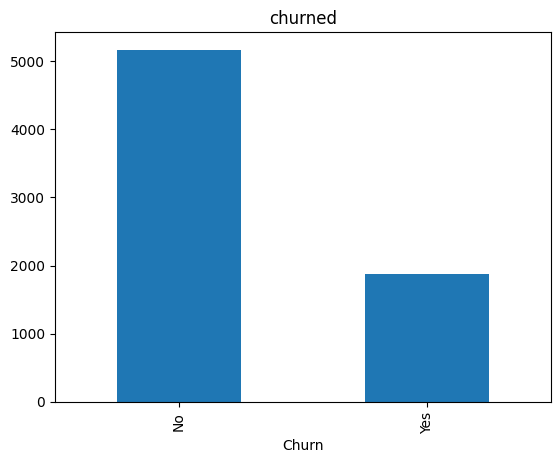

In [23]:
customer_churn_df[target_feature].value_counts().plot(kind="bar").set_title('churned')

**Transforming the data**


In [24]:
#customerId is not required thats why we drop it from the table
customer_churn_df.drop(['customerID'],axis=1,inplace=True)

In [25]:
customer_churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


One Hot Encoding

In [26]:
df1_chunk=pd.get_dummies(data=customer_churn_df,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn'],drop_first=True)
df1_chunk = df1_chunk.replace({True: 1, False: 0})

In [27]:
df1_chunk.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [28]:
df1_chunk.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

filling missing values

In [29]:
from sklearn.impute import SimpleImputer
#imputer will replace missing value with mean
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df1_chunk.TotalCharges=imputer.fit_transform(df1_chunk['TotalCharges'].values.reshape(-1,1))


In [30]:
df1_chunk['TotalCharges'].isnull().sum()

0

**Feature Scaling**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [47]:
#applying StandardScaler for feature Scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
scaler.fit(df1_chunk.drop(['Churn_Yes'],axis=1))
Scaled_features=scaler.transform(df1_chunk.drop(['Churn_Yes'],axis=1))

**Feature Selection**

In [49]:
X=Scaled_features
y=df1_chunk['Churn_Yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
models = []
models.append(('LR', LogisticRegression(max_iter=100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [51]:
# Evaluate each model in turn
import warnings
warnings.filterwarnings('ignore')
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.803651 (0.015941)
KNN: 0.752941 (0.022437)
CART: 0.726572 (0.017887)
NB: 0.676065 (0.022606)
SVC: 0.794726 (0.013811)
RF: 0.799391 (0.015110)
GB: 0.802231 (0.014293)


Here we see there are some algorithms give good accuracy like Logistic Regression,SupportVactor,RandomForestClassifier,GradientBoosting Classifier

**Logistic Regression Prediction**

In [52]:
l_model=LogisticRegression()
l_model.fit(X_train,y_train)

LogisticRegression()

In [57]:
pred_l=l_model.predict(X_test)
pred_l

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
y_test

5616    0
2937    0
1355    0
5441    1
3333    0
       ..
2797    1
412     0
174     0
5761    0
5895    0
Name: Churn_Yes, Length: 2113, dtype: int64

In [59]:
print(classification_report(y_test,pred_l))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [104]:
class_report=classification_report(y_test,pred_l,target_names=['Chunk_No','Chunk_Yes'])
class_report

'              precision    recall  f1-score   support\n\n    Chunk_No       0.84      0.90      0.87      1557\n   Chunk_Yes       0.65      0.53      0.58       556\n\n    accuracy                           0.80      2113\n   macro avg       0.74      0.71      0.73      2113\nweighted avg       0.79      0.80      0.79      2113\n'

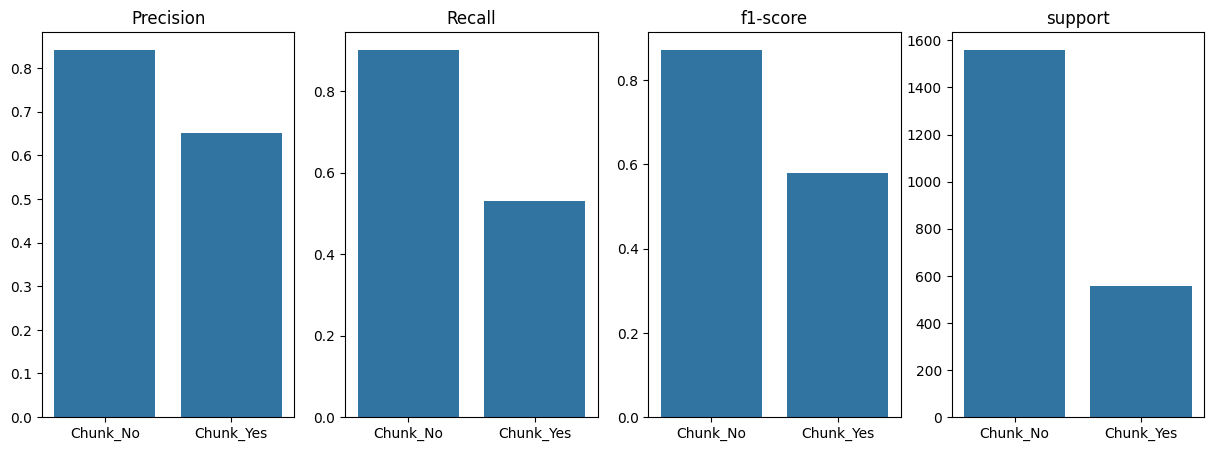

In [105]:
#split report into lines
lines=class_report.split('\n')
#split each line in parts
parts=[line.split() for line in lines[2:-5] ]

class_metrics=dict()
for part in parts:
  class_metrics[part[0]]={'Precision':float(part[1]), 'Recall':float(part[2]), 'f1-score':float(part[3]),'support':int(part[4])}

fig,ax=plt.subplots(1,4,figsize=(15,5))
metrics=['Precision','Recall','f1-score', 'support']
for i,metric in enumerate(metrics):
  sns.barplot(x=list(class_metrics.keys()),y=[class_metrics[key][metric] for key in class_metrics.keys()],ax=ax[i])
  ax[i].set_title(metric)

In [63]:
confusion_matrix_l=confusion_matrix(y_test,pred_l)
confusion_matrix_l

array([[1397,  160],
       [ 262,  294]])

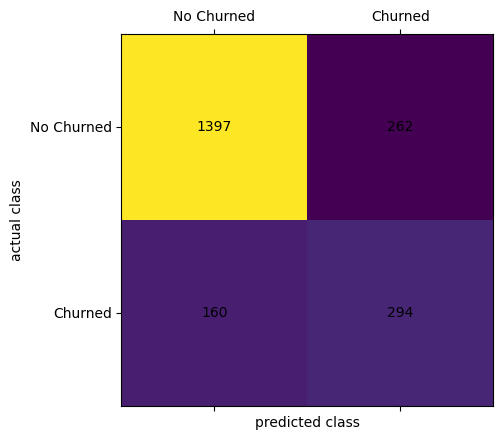

In [69]:
plt.matshow(confusion_matrix(y_test,pred_l))
plt.xlabel('predicted class')
plt.ylabel('actual class')
for i in range(2):
  for j in range(2):
    plt.text(i,j,confusion_matrix_l[i,j],ha='center',va='center')


plt.xticks([0,1],['No Churned','Churned'])
plt.yticks([0,1],['No Churned','Churned'])
plt.show()



In [70]:
l_model.score(X_test,y_test)

0.8002839564600095

In [71]:
accuracy_score(y_test,pred_l)

0.8002839564600095

**Support Vactor Classifier Pridiction**

In [74]:
model=SVC()
model.fit(X_train,y_train)

SVC()

In [75]:
y_pred_model=model.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred_model))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1557
           1       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [77]:
confusion_matrix_svc=confusion_matrix(y_test,y_pred_model)
confusion_matrix_svc

array([[1428,  129],
       [ 291,  265]])

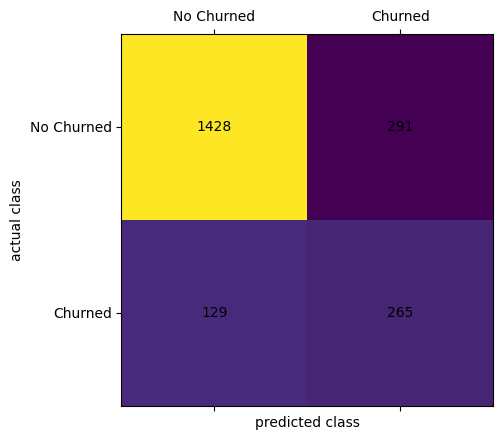

In [78]:
plt.matshow(confusion_matrix(y_test,y_pred_model))
plt.xlabel('predicted class')
plt.ylabel('actual class')
for i in range(2):
  for j in range(2):
    plt.text(i,j,confusion_matrix_svc[i,j],ha='center',va='center')


plt.xticks([0,1],['No Churned','Churned'])
plt.yticks([0,1],['No Churned','Churned'])
plt.show()


In [80]:
model.score(X_test,y_test)

0.8012304779933743

In [81]:
accuracy_score(y_test,y_pred_model)

0.8012304779933743

**Randomforest Classifier Prediction**

In [85]:
model_r = RandomForestClassifier()
model_r.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
y_pred_model_r = model.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred_model_r))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1557
           1       0.61      0.47      0.53       556

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [89]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_model_r)
confusion_matrix_rf

array([[1393,  164],
       [ 295,  261]])

<function matplotlib.pyplot.show(close=None, block=None)>

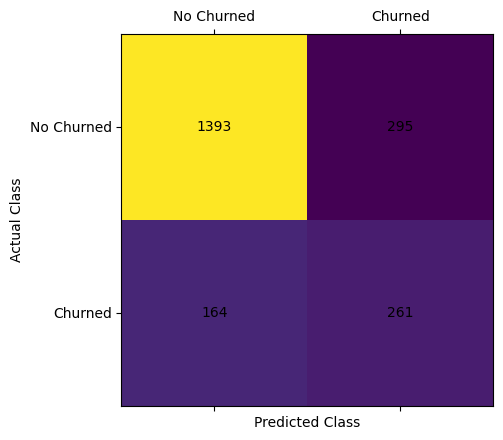

In [91]:
plt.matshow(confusion_matrix_rf)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(i, j, confusion_matrix_rf[i, j], ha='center', va='center')

plt.xticks([0, 1], ['No Churned', 'Churned'])
plt.yticks([0, 1], ['No Churned', 'Churned'])
plt.show

In [92]:
model.score(X_test,y_test)

0.7827733080927591

In [93]:
accuracy_score(y_test,y_pred_model_r)

0.7827733080927591

**GradientBoosting Classifier Prediction**

In [94]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [95]:
y_pred_model = model.predict(X_test)


In [96]:
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.66      0.49      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [98]:
confusion_matrix_gb = confusion_matrix(y_test, y_pred_model)
confusion_matrix_gb

array([[1417,  140],
       [ 283,  273]])

<function matplotlib.pyplot.show(close=None, block=None)>

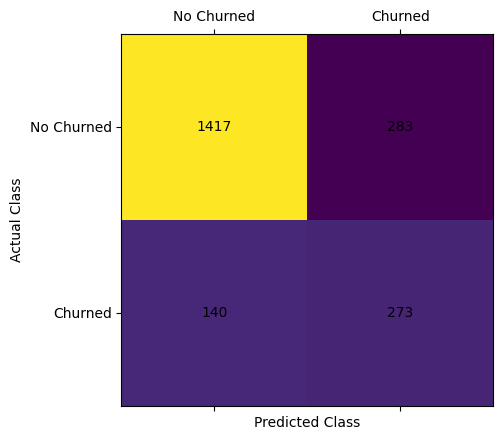

In [99]:
plt.matshow(confusion_matrix_gb)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(i, j, confusion_matrix_gb[i, j], ha='center', va='center')

plt.xticks([0, 1], ['No Churned', 'Churned'])
plt.yticks([0, 1], ['No Churned', 'Churned'])
plt.show

In [100]:
model.score(X_test,y_test)

0.7998106956933271

In [101]:
accuracy_score(y_test,y_pred_model)

0.7998106956933271